In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
df= pd.read_csv("C:/Data/Received_Payments_Data.csv")
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
df.shape

(93937, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [5]:
df.describe().round()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.0,9.390800e+04,93937.0,93937.0
mean,12754.0,1.583908e+11,1066470.0,531201.0
std,14274.0,3.885359e+10,1546901.0,950869.0
min,1044.0,1.421000e+10,0.0,0.0
25%,1888.0,1.470000e+11,81980.0,37663.0
50%,4003.0,1.510000e+11,405344.0,181001.0
75%,20884.0,1.690000e+11,1425606.0,599614.0
max,52940.0,2.970000e+11,10849829.0,10849829.0


In [6]:
#Convert Data columns from Object to Datetime

df['RECEIPT_DATE'] = pd.to_datetime(df['RECEIPT_DATE']) 
df['DUE_DATE'] = pd.to_datetime(df['DUE_DATE'])
df['INVOICE_CREATION_DATE'] = pd.to_datetime(df['INVOICE_CREATION_DATE']) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

In [8]:
df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [9]:
col_names = ['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE']


for col in col_names:
    
    print(df[col].value_counts())   

WIRE             84407
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64
SEPH Corp    23143
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
KHAW Corp        1
EYEW Corp        1
BRAV Corp        1
NOUS Corp        1
ESSE Corp        1
Name: CUSTOMER_NAME, Length: 690, dtype: int64
1409     14698
15768    11052
2315      9716
7530      5382
1888      5062
         ...  
34989        1
35032        1
51402        1
34956        1
2195         1
Name: CUSTOMER_NUMBER, Length: 1054, dtype: int64
1.510000e+11    15985
1.480000e+11     7921
1.070000e+11     7318
1.690000e+11     6605
1.540000e+11     5423
                ...  
9.921000e+10        1
9.921000e+10        1
9.921000e+10        1
9.921000e+10        1
1.421000e+10        1
Name: RECEIPT_DOC_NO, Length: 73, dtype: int64
2021-06-24    4275
20

In [10]:
# Drop columns not relevant
df.drop('RECEIPT_DOC_NO', axis=1, inplace= True)

In [11]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [12]:
df['RECEIPT_DATE'] > df['DUE_DATE']

0         True
1         True
2        False
3         True
4         True
         ...  
93932     True
93933     True
93934     True
93935     True
93936     True
Length: 93937, dtype: bool

In [13]:
(df['RECEIPT_DATE'] > df['DUE_DATE']).astype(int) 

0        1
1        1
2        0
3        1
4        1
        ..
93932    1
93933    1
93934    1
93935    1
93936    1
Length: 93937, dtype: int32

In [14]:
# Derive Target variable based on the RECEIPT_DATE & DUE_DATE. If RECEIPT_DATE is greater than DUE_DATE, then the vendor 
# has delayed payment
df['LATE_PAYMENT'] = (df['RECEIPT_DATE'] > df['DUE_DATE']).astype(int) 

In [15]:
# As stated in the problem statement, removing rows with negative Local Amount
df = df[df['Local Amount'] > 0]
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,LATE_PAYMENT
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [16]:
df.shape

(92811, 16)

In [17]:
df['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

In [18]:
# As we will only use USD, hence dropping the Local Amount column
df.drop('Local Amount', axis= 1, inplace= True)

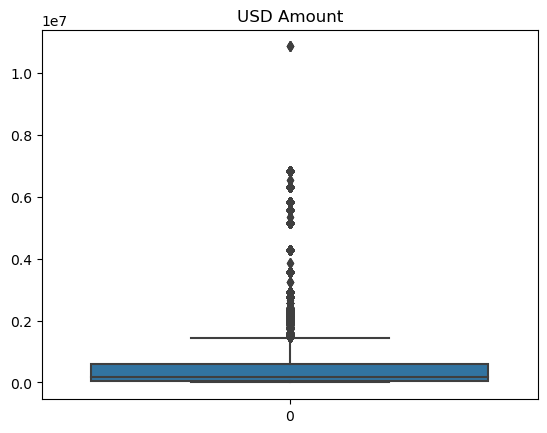

In [19]:
sns.boxplot(df['USD Amount'])
plt.title('USD Amount')
plt.show()

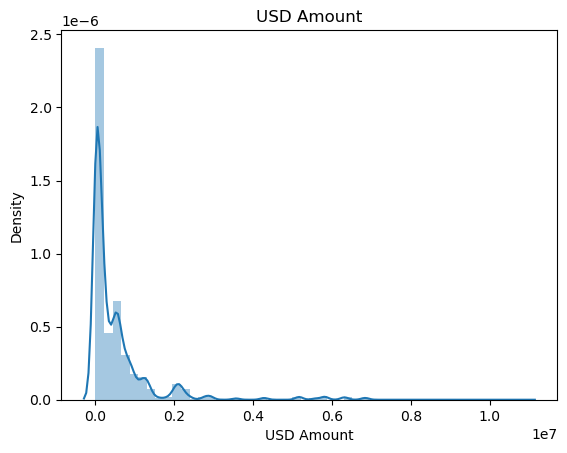

In [20]:
sns.distplot(df['USD Amount'])
plt.title('USD Amount')
plt.show()

In [21]:
df['PAYMENT_TERM'].unique() #check unique vaues

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [22]:
df['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19742
30 Days from Inv Date                                      14022
60 Days from EOM                                           12512
30 Days from EOM                                           11301
15 Days from EOM                                            7533
Immediate Payment                                           5468
Immediate                                                   4946
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1238
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

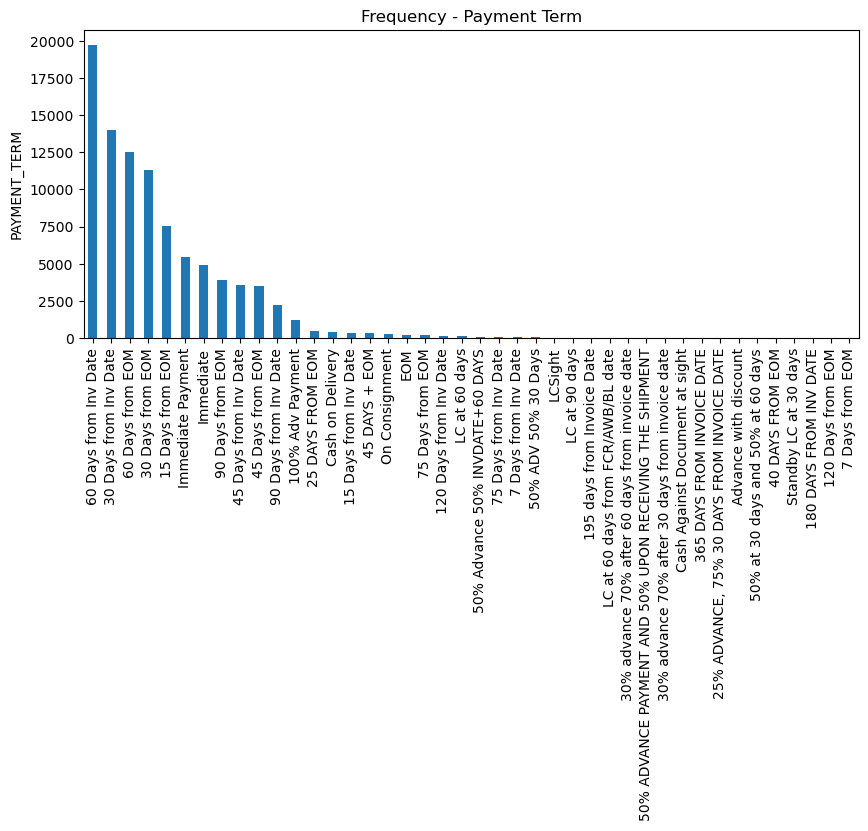

In [23]:
plt.figure(figsize = [10,4])
df['PAYMENT_TERM'].value_counts().plot.bar(ylabel = 'PAYMENT_TERM')
plt.title('Frequency - Payment Term')
plt.show()

In [24]:
df['INVOICE_CLASS'].value_counts()

INV    87313
CM      4946
DM       552
Name: INVOICE_CLASS, dtype: int64

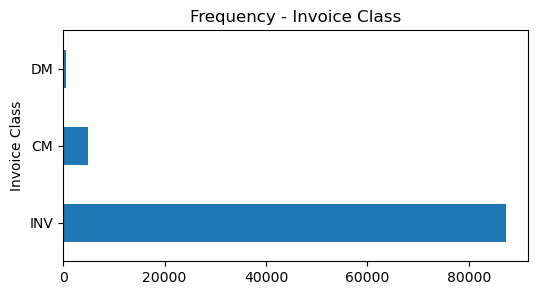

In [25]:
plt.figure(figsize = [6,3])
df['INVOICE_CLASS'].value_counts().plot.barh(ylabel = 'Invoice Class')
plt.title('Frequency - Invoice Class')
plt.show()

In [26]:
df['INVOICE_CURRENCY_CODE'].value_counts()

SAR    38491
AED    32119
USD    18389
EUR     1518
KWD     1088
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: INVOICE_CURRENCY_CODE, dtype: int64

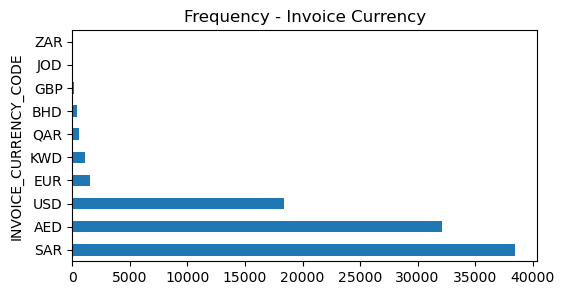

In [27]:
plt.figure(figsize = [6,3])
df['INVOICE_CURRENCY_CODE'].value_counts().plot.barh(ylabel = 'INVOICE_CURRENCY_CODE')
plt.title('Frequency - Invoice Currency')
plt.show()

In [28]:
df['INVOICE_TYPE'].value_counts()

Goods        66569
Non Goods    26242
Name: INVOICE_TYPE, dtype: int64

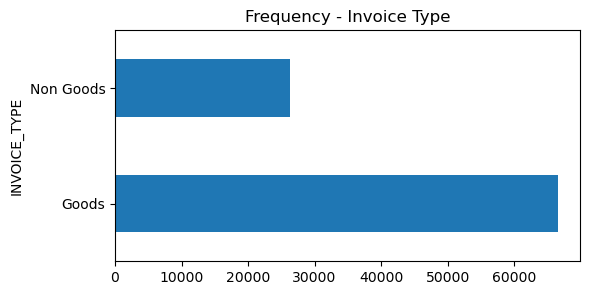

In [29]:
plt.figure(figsize = [6,3])
df['INVOICE_TYPE'].value_counts().plot.barh(ylabel = 'INVOICE_TYPE')
plt.title('Frequency - Invoice Type')
plt.show()

In [30]:
df['RECEIPT_METHOD'].value_counts()

WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64

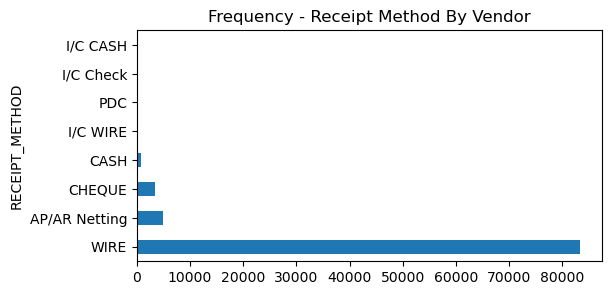

In [31]:
plt.figure(figsize = [6,3])
df['RECEIPT_METHOD'].value_counts().plot.barh(ylabel = 'RECEIPT_METHOD')
plt.title('Frequency - Receipt Method By Vendor')
plt.show()

In [32]:
df['LATE_PAYMENT'].value_counts() #this is a derived column as target variable

1    60933
0    31878
Name: LATE_PAYMENT, dtype: int64

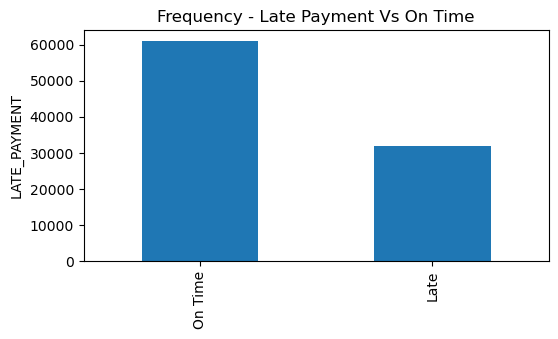

In [33]:
plt.figure(figsize = [6,3])
df['LATE_PAYMENT'].value_counts().plot.bar(ylabel = 'LATE_PAYMENT')
plt.title('Frequency - Late Payment Vs On Time')
plt.xticks((0,1),('On Time','Late'))
plt.show()

In [34]:
df.groupby(by = df['DUE_DATE'].dt.month).count()['LATE_PAYMENT']

DUE_DATE
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: LATE_PAYMENT, dtype: int64

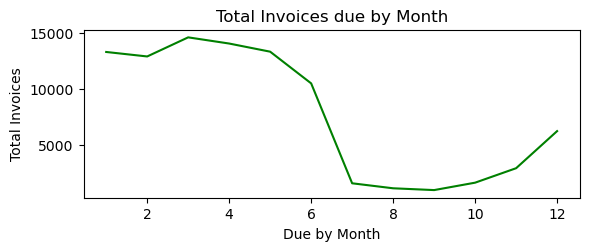

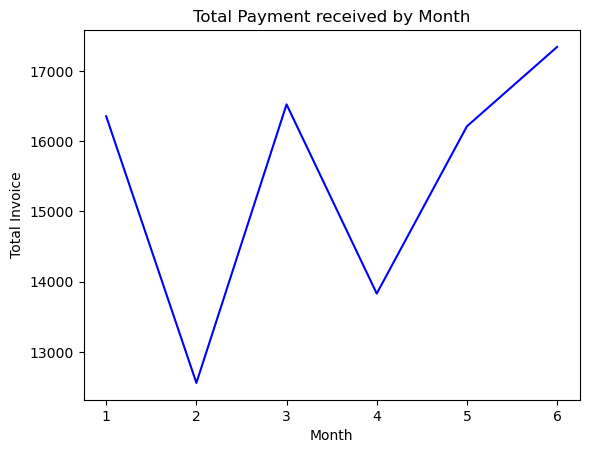

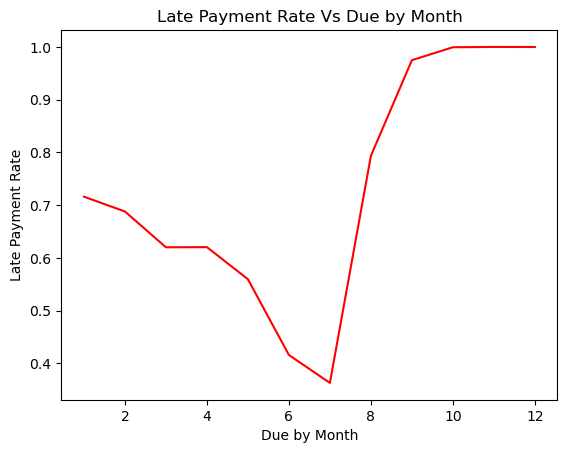

In [35]:
plt.subplot(2,1,1)

# df.groupby(by = df['DUE_DATE'].dt.month).count()['LATE_PAYMENT'].plot.bar()
plt.plot(df.groupby(by = df['DUE_DATE'].dt.month).count()['LATE_PAYMENT'], color= 'g')
plt.title('Total Invoices due by Month')
plt.ylabel('Total Invoices')
plt.xlabel('Due by Month')
plt.show()

# df.groupby(by = df['RECEIPT_DATE'].dt.month).count()['DUE_DATE'].plot.bar()
plt.plot(df.groupby(by = df['RECEIPT_DATE'].dt.month).count()['DUE_DATE'], color= 'b')
plt.title('Total Payment received by Month')
plt.ylabel('Total Invoice')
plt.xlabel('Month')
plt.show()

# df.groupby(by = df['DUE_DATE'].dt.month).mean()['LATE_PAYMENT'].plot.bar()
plt.plot(df.groupby(by = df['DUE_DATE'].dt.month).mean()['LATE_PAYMENT'], color= 'r')
plt.title('Late Payment Rate Vs Due by Month')
plt.ylabel('Late Payment Rate')
plt.xlabel('Due by Month')
plt.show()

In [36]:
df.pivot_table(index = 'LATE_PAYMENT', values= 'USD Amount', aggfunc= ['mean','median',np.std])

,mean,median,std
,USD Amount,USD Amount,USD Amount
LATE_PAYMENT,,,
0,575247.544230,224785.0410,879205.782363
1,517974.153529,165499.3105,991505.462081


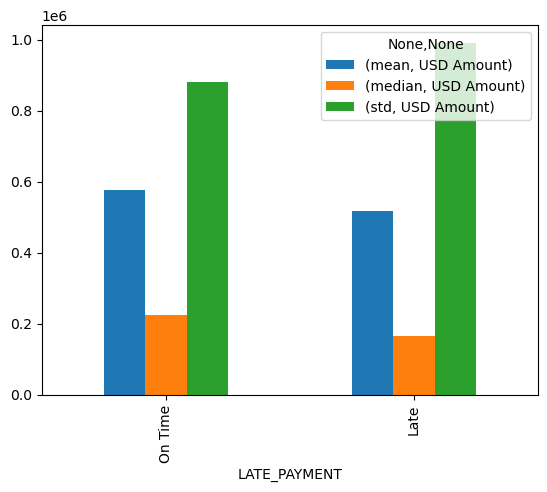

In [37]:
df.pivot_table(index = 'LATE_PAYMENT', values= 'USD Amount', aggfunc= ['mean','median',np.std]).plot.bar()
plt.xticks((0,1),('On Time','Late'))
plt.show()

In [38]:
df.groupby('CUSTOMER_NAME').count()['LATE_PAYMENT'].sort_values(ascending= False).reset_index()

,CUSTOMER_NAME,LATE_PAYMENT
0,SEPH Corp,23075
1,FARO Corp,15004
2,PARF Corp,6624
3,ALLI Corp,5645
4,AREE Corp,2224
...,...,...
684,DEFI Corp,1
685,DESI Corp,1
686,OMRA Corp,1
687,NOUS Corp,1


In [39]:
no_of_customers = df.groupby('CUSTOMER_NAME').count()['LATE_PAYMENT'].sort_values(ascending= False).reset_index()
no_of_customers

,CUSTOMER_NAME,LATE_PAYMENT
0,SEPH Corp,23075
1,FARO Corp,15004
2,PARF Corp,6624
3,ALLI Corp,5645
4,AREE Corp,2224
...,...,...
684,DEFI Corp,1
685,DESI Corp,1
686,OMRA Corp,1
687,NOUS Corp,1


In [40]:
df.groupby('INVOICE_TYPE').mean()['LATE_PAYMENT']

INVOICE_TYPE
Goods        0.708137
Non Goods    0.525608
Name: LATE_PAYMENT, dtype: float64

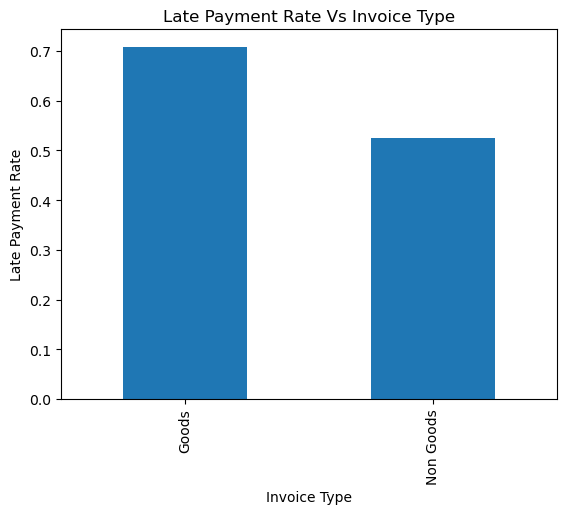

In [41]:
df.groupby(by = df['INVOICE_TYPE']).mean()['LATE_PAYMENT'].plot.bar()
plt.title('Late Payment Rate Vs Invoice Type')
plt.ylabel('Late Payment Rate')
plt.xlabel('Invoice Type')
plt.show()

In [42]:
# Immediate and Immediate payment can be merged as they provide similar information
# 45 Days from EOM and 45 DAYS + EOM can be merged as they provide similar information

df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : 'Immediate Payment' if x == 'Immediate' else x)
df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : '45 Days from EOM' if x == '45 DAYS + EOM' else x)

In [43]:
df['PAYMENT_TERM'].value_counts(normalize = True)

60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.151081
60 Days from EOM                                           0.134812
30 Days from EOM                                           0.121764
Immediate Payment                                          0.112207
15 Days from EOM                                           0.081165
90 Days from EOM                                           0.041945
45 Days from EOM                                           0.041277
45 Days from Inv Date                                      0.038250
90 Days from Inv Date                                      0.023823
100% Adv Payment                                           0.013339
25 DAYS FROM EOM                                           0.004978
Cash on Delivery                                           0.004504
15 Days from Inv Date                                      0.003836
On Consignment                                  

In [44]:
#calculating cummulative sum for payment term

df['PAYMENT_TERM'].value_counts(normalize = True).cumsum()


60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                                  

In [45]:
final_payment_terms = df['PAYMENT_TERM'].value_counts(normalize = True).cumsum().index[:10]
final_payment_terms

Index(['60 Days from Inv Date', '30 Days from Inv Date', '60 Days from EOM',
       '30 Days from EOM', 'Immediate Payment', '15 Days from EOM',
       '90 Days from EOM', '45 Days from EOM', '45 Days from Inv Date',
       '90 Days from Inv Date'],
      dtype='object')

In [46]:
# Considering top 10 payment terms that contribute >95% of data & rest categorizing them under 'Other Payment Terms'
df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : x if x in final_payment_terms else 'Other Payment Terms')

In [47]:
df['PAYMENT_TERM'].value_counts(normalize = True).cumsum()

60 Days from Inv Date    0.212712
30 Days from Inv Date    0.363793
60 Days from EOM         0.498605
30 Days from EOM         0.620368
Immediate Payment        0.732575
15 Days from EOM         0.813740
90 Days from EOM         0.855685
45 Days from EOM         0.896963
Other Payment Terms      0.937928
45 Days from Inv Date    0.976177
90 Days from Inv Date    1.000000
Name: PAYMENT_TERM, dtype: float64

In [48]:
payment_term_dummies = pd.get_dummies(df['PAYMENT_TERM']).drop('Other Payment Terms', axis=1) 
payment_term_dummies

,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
93932,0,0,0,0,0,0,0,0,0,1
93933,0,0,0,0,0,0,0,0,0,1
93934,0,0,0,0,0,0,0,0,0,1
93935,0,0,0,0,0,0,1,0,0,0


In [49]:
df = pd.concat([df, payment_term_dummies], axis = 1)
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,1,0,0,0,0,0,0,0,0
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,1,0,0,0,0,0,0,0
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,...,0,0,1,0,0,0,0,0,0,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,...,0,0,1,0,0,0,0,0,0,0
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,...,0,0,1,0,0,0,0,0,0,0


In [50]:
df.shape

(92811, 25)

In [51]:
Invoice_class_dummies = pd.get_dummies(df['INVOICE_CLASS'], dtype=int)
Invoice_class_dummies

,CM,DM,INV
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
93932,1,0,0
93933,1,0,0
93934,1,0,0
93935,0,0,1


In [52]:
df = pd.concat([df, Invoice_class_dummies], axis = 1)
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,...,0,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,0,0,1


### Open Invoice Data Import

In [53]:
open_inv_df = pd.read_csv('C:/Data/Open_Invoice_data.csv', encoding= 'latin1')

open_inv_df.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [54]:
open_inv_df.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number','Customer Account No','Local Amount'], axis= 1, inplace= True)


In [55]:
open_inv_df.shape

(88204, 7)

In [56]:
open_inv_df.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [57]:
open_inv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [58]:
open_inv_df['Due Date'] = pd.to_datetime(open_inv_df['Due Date'])
open_inv_df['INV_CREATION_DATE'] = pd.to_datetime(open_inv_df['INV_CREATION_DATE'])

In [59]:
open_inv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      88204 non-null  object        
 1   Payment Term       88204 non-null  object        
 2   Due Date           88204 non-null  datetime64[ns]
 3   Transaction Class  88204 non-null  object        
 4   AGE                88204 non-null  int64         
 5   USD Amount         88204 non-null  object        
 6   INV_CREATION_DATE  88204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 4.7+ MB


In [60]:
open_inv_df['USD Amount'] = open_inv_df['USD Amount'].apply(lambda x : x.replace(',',''))

open_inv_df['USD Amount'] = open_inv_df['USD Amount'].astype(int)

In [61]:
open_inv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      88204 non-null  object        
 1   Payment Term       88204 non-null  object        
 2   Due Date           88204 non-null  datetime64[ns]
 3   Transaction Class  88204 non-null  object        
 4   AGE                88204 non-null  int64         
 5   USD Amount         88204 non-null  int32         
 6   INV_CREATION_DATE  88204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.4+ MB


In [62]:
open_inv_df.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,2021-12-21,CREDIT NOTE,105,-3088,2021-12-21 12:53:00
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00
3,AL R Corp,15 Days from Inv Date,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00
4,ALLI Corp,30 Days from EOM,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00


In [63]:
open_inv_df['Payment Term'].value_counts(normalize = True).cumsum()

30 Days from Inv Date                                      0.208324
60 Days from Inv Date                                      0.408791
Immediate Payment                                          0.593715
60 Days from EOM                                           0.686998
Immediate                                                  0.770861
30 Days from EOM                                           0.831402
90 Days from EOM                                           0.861526
90 Days from Inv Date                                      0.889234
15 Days from EOM                                           0.909959
75 Days from EOM                                           0.928654
45 Days from Inv Date                                      0.946352
100% Adv Payment                                           0.961362
45 Days from EOM                                           0.971362
120 Days from EOM                                          0.980432
EOM                                             

In [64]:
final_payment_terms

Index(['60 Days from Inv Date', '30 Days from Inv Date', '60 Days from EOM',
       '30 Days from EOM', 'Immediate Payment', '15 Days from EOM',
       '90 Days from EOM', '45 Days from EOM', '45 Days from Inv Date',
       '90 Days from Inv Date'],
      dtype='object')

In [65]:
# Considering top 10 payment terms that contribute >95% of data & rest categorizing them under 'Other Payment Terms'
open_inv_df['Payment Term'] = open_inv_df['Payment Term'].apply(lambda x : x if x in final_payment_terms else 'Other Payment Terms')

In [66]:
open_inv_df['Payment Term'].value_counts(normalize = True).cumsum()

30 Days from Inv Date    0.208324
60 Days from Inv Date    0.408791
Immediate Payment        0.593715
Other Payment Terms      0.739921
60 Days from EOM         0.833205
30 Days from EOM         0.893746
90 Days from EOM         0.923870
90 Days from Inv Date    0.951578
15 Days from EOM         0.972303
45 Days from Inv Date    0.990000
45 Days from EOM         1.000000
Name: Payment Term, dtype: float64

In [67]:
payment_term__op_inv_dummies = pd.get_dummies(open_inv_df['Payment Term']).drop('Other Payment Terms', axis=1) 
payment_term__op_inv_dummies

,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88199,0,0,0,0,0,0,0,0,0,0
88200,0,0,0,0,0,0,0,0,0,0
88201,0,1,0,0,0,0,0,0,0,0
88202,0,0,0,0,0,0,1,0,0,0


In [68]:
open_inv_df = pd.concat([open_inv_df, payment_term__op_inv_dummies], axis = 1)


In [69]:
open_inv_df = open_inv_df.drop(['Payment Term'], axis = 1)

In [70]:
open_inv_df.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,GIVE Corp,2021-12-21,CREDIT NOTE,105,-3088,2021-12-21 12:53:00,0,0,0,0,0,0,0,0,0,0
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [71]:
open_inv_df['Transaction Class'].value_counts()

INVOICE        79523
CREDIT NOTE     5954
PAYMENT         1443
DEBIT NOTE      1284
Name: Transaction Class, dtype: int64

In [72]:
open_inv_df['Transaction Class'] = open_inv_df['Transaction Class'].map(lambda x : 'INVOICE' if x=='INVOICE' else 'DM')
open_inv_df['Transaction Class'].value_counts()

INVOICE    79523
DM          8681
Name: Transaction Class, dtype: int64

In [73]:
trans_class_dummies = pd.get_dummies(open_inv_df['Transaction Class']) #Creating dummy data

open_inv_df = open_inv_df.join(trans_class_dummies).drop('Transaction Class', axis=1 )

In [74]:
open_inv_df.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INVOICE
0,GIVE Corp,2021-12-21,105,-3088,2021-12-21 12:53:00,0,0,0,0,0,0,0,0,0,0,1,0
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1


In [75]:
open_inv_df.rename(columns = {'INVOICE' : 'INV'}, inplace = True)

In [76]:
open_inv_df.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
0,GIVE Corp,2021-12-21,105,-3088,2021-12-21 12:53:00,0,0,0,0,0,0,0,0,0,0,1,0
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1


In [77]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,...,0,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,0,0,1


In [78]:
df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'LATE_PAYMENT',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [79]:
open_inv_df.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV'],
      dtype='object')

### Model Building

In [80]:
import datetime as dt

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92811 entries, 0 to 93936
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         92811 non-null  object        
 1   CUSTOMER_NAME          92811 non-null  object        
 2   CUSTOMER_NUMBER        92811 non-null  int64         
 3   RECEIPT_DATE           92811 non-null  datetime64[ns]
 4   CLASS                  92811 non-null  object        
 5   CURRENCY_CODE          92811 non-null  object        
 6   USD Amount             92811 non-null  float64       
 7   INVOICE_ALLOCATED      92811 non-null  object        
 8   INVOICE_CREATION_DATE  92811 non-null  datetime64[ns]
 9   DUE_DATE               92811 non-null  datetime64[ns]
 10  PAYMENT_TERM           92811 non-null  object        
 11  INVOICE_CLASS          92811 non-null  object        
 12  INVOICE_CURRENCY_CODE  92811 non-null  object        
 13  I

In [82]:
# grouped_df['recency'] = grouped_df['recency'].dt.days
# grouped_df.head()

(df['RECEIPT_DATE'] - df['INVOICE_CREATION_DATE']).dt.days

0        169
1         33
2          1
3         47
4         47
        ... 
93932     94
93933     94
93934     94
93935     67
93936     51
Length: 92811, dtype: int64

In [83]:
# find the payment days

df['payment_days_diff'] = (df['RECEIPT_DATE'] - df['INVOICE_CREATION_DATE']).dt.days

df['payment_days_diff'].head()

0    169
1     33
2      1
3     47
4     47
Name: payment_days_diff, dtype: int64

In [84]:
# find the term days

df['term_days_diff'] = (df['DUE_DATE'] - df['INVOICE_CREATION_DATE']).dt.days

df['term_days_diff'].head()

0    58
1    30
2    30
3    30
4    30
Name: term_days_diff, dtype: int64

In [85]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,payment_days_diff,term_days_diff
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,0,0,0,0,0,0,1,169,58
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,0,0,0,0,0,1,33,30
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,...,0,0,0,0,0,0,0,1,1,30
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,1,47,30
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,1,47,30


In [86]:
# Grouping by customer name and creating dataframe that will include average and std for pay_delta

df_cust_pay_days = df.groupby('CUSTOMER_NAME')['payment_days_diff'].aggregate(['mean','std'])
df_cust_pay_days.columns= ['cust_pay_days_mean','cust_pay_days_std']

df_cust_term = df.groupby('CUSTOMER_NAME')['term_days_diff'].aggregate(['mean','std'])
df_cust_term.columns= ['cust_term_mean','cust_term_std']

df_cust_USD = df.groupby('CUSTOMER_NAME')['USD Amount'].aggregate(['mean','std'])
df_cust_USD.columns= ['USD_mean','USD_std']

In [87]:
df_cust_cluster = df_cust_pay_days.join(df_cust_USD)#.join(df_cluster_term)

df_cust_cluster.head()

,cust_pay_days_mean,cust_pay_days_std,USD_mean,USD_std
CUSTOMER_NAME,,,,
3D D Corp,24.395349,13.040449,33590.027423,72616.633836
6TH Corp,40.666667,7.952987,3977.384162,1044.577231
A3 D Corp,45.400000,52.581366,2052.923142,0.000000
ABC Corp,16.000000,0.000000,19701.470000,0.000000
ABDU Corp,76.906250,54.919326,200272.886166,273470.655218


In [88]:
df_cust_cluster = df_cust_cluster.join(df_cust_term)
df_cust_cluster

,cust_pay_days_mean,cust_pay_days_std,USD_mean,USD_std,cust_term_mean,cust_term_std
CUSTOMER_NAME,,,,,,
3D D Corp,24.395349,13.040449,33590.027423,72616.633836,32.372093,15.387431
6TH Corp,40.666667,7.952987,3977.384162,1044.577231,78.444444,7.264832
A3 D Corp,45.400000,52.581366,2052.923142,0.000000,26.600000,2.190890
ABC Corp,16.000000,0.000000,19701.470000,0.000000,90.000000,0.000000
ABDU Corp,76.906250,54.919326,200272.886166,273470.655218,70.941406,30.821187
...,...,...,...,...,...,...
YOUS Corp,117.000000,33.949160,15834.963333,3554.153558,75.000000,35.032452
ZAHR Corp,144.928571,52.197059,16144.235194,5401.793704,95.785714,17.703448
ZAIN Corp,67.095238,46.326945,57555.670573,29541.647234,32.119048,17.081158


In [89]:
df_cust_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_pay_days_mean  689 non-null    float64
 1   cust_pay_days_std   603 non-null    float64
 2   USD_mean            689 non-null    float64
 3   USD_std             603 non-null    float64
 4   cust_term_mean      689 non-null    float64
 5   cust_term_std       603 non-null    float64
dtypes: float64(6)
memory usage: 53.8+ KB


### Check for outliers

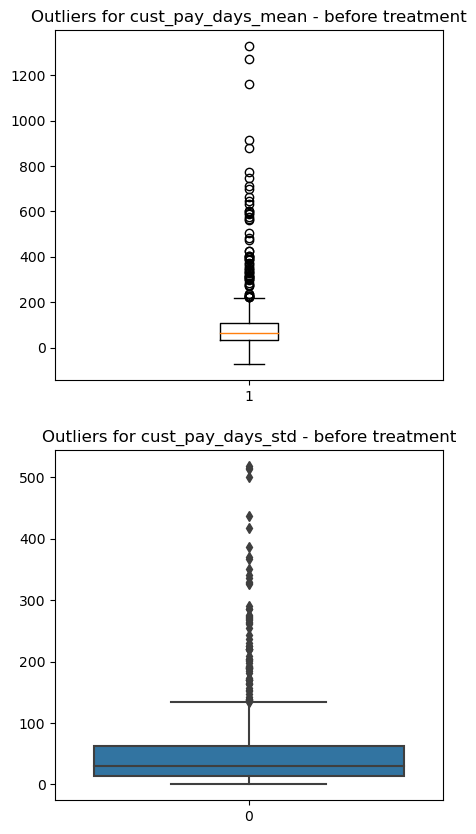

In [90]:
plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
plt.boxplot(df_cust_cluster['cust_pay_days_mean'])
plt.title('Outliers for cust_pay_days_mean - before treatment')
plt.subplot(2,1,2)
sns.boxplot(df_cust_cluster['cust_pay_days_std'])
plt.title('Outliers for cust_pay_days_std - before treatment')
plt.show()

In [91]:
quantile_mean = df_cust_cluster['cust_pay_days_mean'].quantile(0.99)
quantile_mean

714.4400000000002

In [92]:
df_cust_cluster['cust_pay_days_mean'] < quantile_mean

CUSTOMER_NAME
3D D Corp    True
6TH  Corp    True
A3 D Corp    True
ABC  Corp    True
ABDU Corp    True
             ... 
YOUS Corp    True
ZAHR Corp    True
ZAIN Corp    True
ZERO Corp    True
ZV F Corp    True
Name: cust_pay_days_mean, Length: 689, dtype: bool

In [93]:
quantile_std = df_cust_cluster['cust_pay_days_std'].quantile(0.993)
quantile_std

432.6651243821987

In [94]:
df_cust_cluster['cust_pay_days_std'] < quantile_std

CUSTOMER_NAME
3D D Corp    True
6TH  Corp    True
A3 D Corp    True
ABC  Corp    True
ABDU Corp    True
             ... 
YOUS Corp    True
ZAHR Corp    True
ZAIN Corp    True
ZERO Corp    True
ZV F Corp    True
Name: cust_pay_days_std, Length: 689, dtype: bool

In [95]:
df_cust_cluster1 = df_cust_cluster[(df_cust_cluster['cust_pay_days_mean'] < quantile_mean) & (df_cust_cluster['cust_pay_days_std'] < quantile_std)]
df_cust_cluster1

,cust_pay_days_mean,cust_pay_days_std,USD_mean,USD_std,cust_term_mean,cust_term_std
CUSTOMER_NAME,,,,,,
3D D Corp,24.395349,13.040449,33590.027423,72616.633836,32.372093,15.387431
6TH Corp,40.666667,7.952987,3977.384162,1044.577231,78.444444,7.264832
A3 D Corp,45.400000,52.581366,2052.923142,0.000000,26.600000,2.190890
ABC Corp,16.000000,0.000000,19701.470000,0.000000,90.000000,0.000000
ABDU Corp,76.906250,54.919326,200272.886166,273470.655218,70.941406,30.821187
...,...,...,...,...,...,...
YOUS Corp,117.000000,33.949160,15834.963333,3554.153558,75.000000,35.032452
ZAHR Corp,144.928571,52.197059,16144.235194,5401.793704,95.785714,17.703448
ZAIN Corp,67.095238,46.326945,57555.670573,29541.647234,32.119048,17.081158


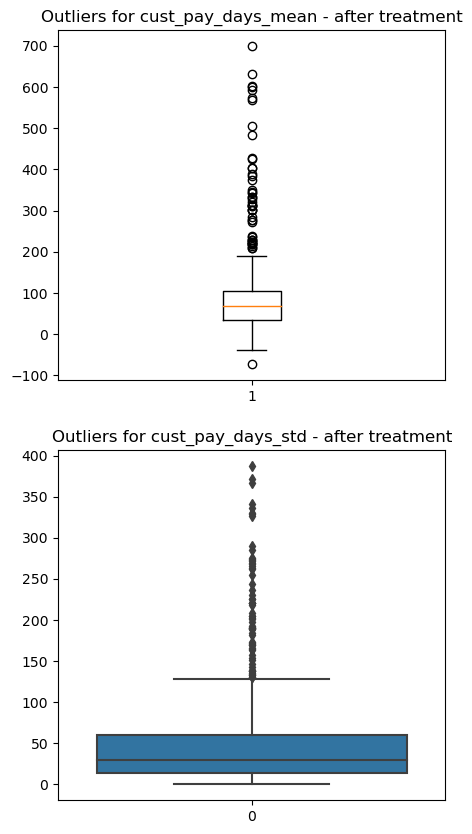

In [96]:
plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
plt.boxplot(df_cust_cluster1['cust_pay_days_mean'])
plt.title('Outliers for cust_pay_days_mean - after treatment')
plt.subplot(2,1,2)
sns.boxplot(df_cust_cluster1['cust_pay_days_std'])
plt.title('Outliers for cust_pay_days_std - after treatment')
plt.show()

### Feature Scaling

In [97]:
df_cust_cluster1.describe()

,cust_pay_days_mean,cust_pay_days_std,USD_mean,USD_std,cust_term_mean,cust_term_std
count,592.000000,592.000000,5.920000e+02,5.920000e+02,592.000000,592.000000
mean,88.878994,53.679291,6.117974e+04,4.731350e+04,40.125936,11.573781
std,96.237425,67.821464,1.292020e+05,1.167523e+05,24.841049,13.760131
min,-73.369231,0.000000,3.316481e+02,0.000000e+00,-19.714286,0.000000
25%,34.791667,13.710068,4.775797e+03,1.025977e+03,28.852758,0.000000
50%,67.360119,29.211781,1.936520e+04,7.569300e+03,39.897799,7.764449
75%,104.041667,60.004942,6.044242e+04,4.519618e+04,55.084203,20.166272
max,699.000000,387.045105,1.409912e+06,1.524909e+06,120.000000,102.858664


In [98]:
df_cust_cluster1.head()

,cust_pay_days_mean,cust_pay_days_std,USD_mean,USD_std,cust_term_mean,cust_term_std
CUSTOMER_NAME,,,,,,
3D D Corp,24.395349,13.040449,33590.027423,72616.633836,32.372093,15.387431
6TH Corp,40.666667,7.952987,3977.384162,1044.577231,78.444444,7.264832
A3 D Corp,45.400000,52.581366,2052.923142,0.000000,26.600000,2.190890
ABC Corp,16.000000,0.000000,19701.470000,0.000000,90.000000,0.000000
ABDU Corp,76.906250,54.919326,200272.886166,273470.655218,70.941406,30.821187


In [99]:
df_cust_cluster1 = df_cust_cluster1.reset_index()
df_cust_cluster1.head()

,CUSTOMER_NAME,cust_pay_days_mean,cust_pay_days_std,USD_mean,USD_std,cust_term_mean,cust_term_std
0,3D D Corp,24.395349,13.040449,33590.027423,72616.633836,32.372093,15.387431
1,6TH Corp,40.666667,7.952987,3977.384162,1044.577231,78.444444,7.264832
2,A3 D Corp,45.400000,52.581366,2052.923142,0.000000,26.600000,2.190890
3,ABC Corp,16.000000,0.000000,19701.470000,0.000000,90.000000,0.000000
4,ABDU Corp,76.906250,54.919326,200272.886166,273470.655218,70.941406,30.821187


In [100]:
df_days = df_cust_cluster1[['CUSTOMER_NAME','cust_pay_days_mean','cust_pay_days_std']]
df_days.head()

,CUSTOMER_NAME,cust_pay_days_mean,cust_pay_days_std
0,3D D Corp,24.395349,13.040449
1,6TH Corp,40.666667,7.952987
2,A3 D Corp,45.400000,52.581366
3,ABC Corp,16.000000,0.000000
4,ABDU Corp,76.906250,54.919326


In [101]:
# Standardization
rfm_df = df_days[['cust_pay_days_mean','cust_pay_days_std']]

# instantiate
scaler = StandardScaler()

# fit and transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [102]:
rfm_df_scaled.shape

(592, 2)

# Hopkins Test

In [103]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [104]:
#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['cust_pay_days_mean', 'cust_pay_days_std']

In [105]:
# 0 - uniform data and 1 - highly clustered data
hopkins(rfm_df_scaled)

0.9228566142698896

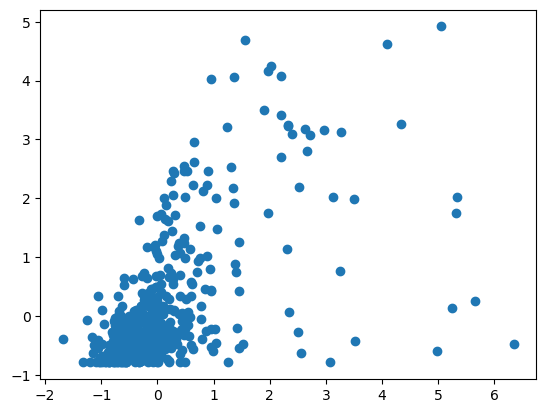

In [106]:
plt.scatter(rfm_df_scaled['cust_pay_days_mean'] , rfm_df_scaled['cust_pay_days_std'])
plt.show()

## Model Building

In [107]:
kmeans = KMeans(n_clusters=4, max_iter= 20)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=20, n_clusters=4)

In [108]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## Finding the Optimal Number of Clusters

### SSD (sum of squared distances  or euclidean distance --> SSD of each data point from its cluster center)

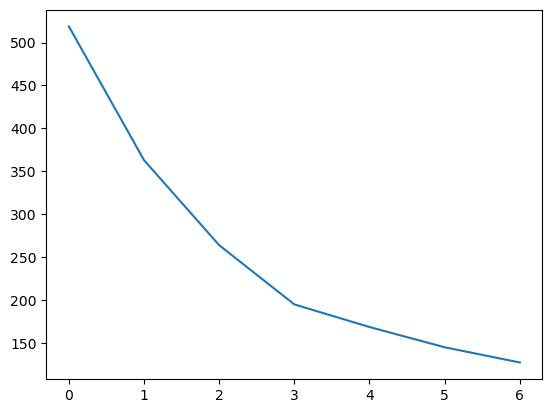

In [109]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
        
    #kmeans.inertia_ = Sum of squared distances of samples to their closest cluster center,weighted by the sample weights if provided
    ssd.append(kmeans.inertia_) # intertia_ gives SSD
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

In [110]:
kmeans.inertia_

127.37060320410441

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [111]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7019665026916853
For n_clusters=3, the silhouette score is 0.5984749095944208
For n_clusters=4, the silhouette score is 0.6098065129693528
For n_clusters=5, the silhouette score is 0.42548546330570874
For n_clusters=6, the silhouette score is 0.42220954720479476
For n_clusters=7, the silhouette score is 0.3905826765311651
For n_clusters=8, the silhouette score is 0.40153358221475055


# Final clustering

In [112]:
## After analysing both, we can safely say that n_clusters = 3 or 5 for our case as the silhoutte score does not vary much after that
kmeans = KMeans(n_clusters=3, max_iter= 30)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=30, n_clusters=3)

In [113]:
n_cluster_3 = kmeans.labels_

In [114]:
print(df_days.shape)
print(rfm_df_scaled.shape)

(592, 3)
(592, 2)


In [115]:
df_days['cluster_id'] = n_cluster_3
df_days.head(20)

,CUSTOMER_NAME,cust_pay_days_mean,cust_pay_days_std,cluster_id
0,3D D Corp,24.395349,13.040449,0
1,6TH Corp,40.666667,7.952987,0
2,A3 D Corp,45.400000,52.581366,0
3,ABC Corp,16.000000,0.000000,0
4,ABDU Corp,76.906250,54.919326,0
5,ABED Corp,14.500000,4.949747,0
6,ABEE Corp,2.000000,4.976870,0
7,ABU Corp,126.454545,137.440433,2
8,ABWA Corp,56.500000,17.108477,0
9,ACTO Corp,26.333333,53.500779,0


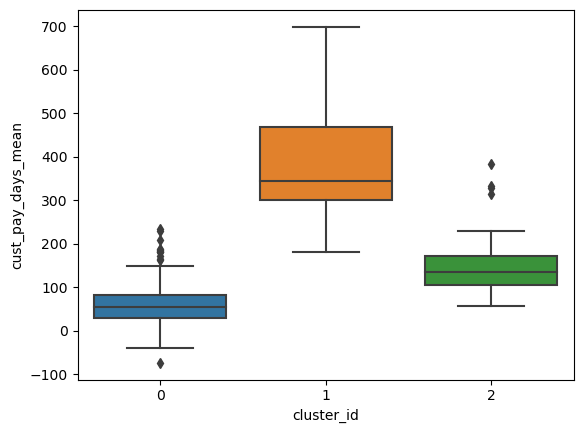

In [116]:
# plot
sns.boxplot(x='cluster_id', y='cust_pay_days_mean', data = df_days)
plt.show()

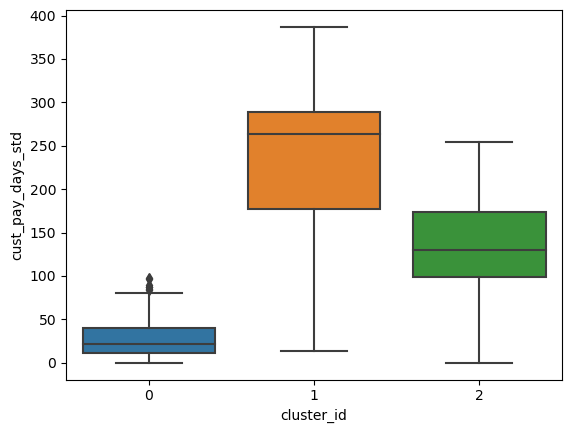

In [117]:
# plot
sns.boxplot(x='cluster_id', y='cust_pay_days_std', data = df_days)
plt.show()

In [118]:
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,payment_days_diff,term_days_diff
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,0,0,0,0,0,0,1,169,58
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,0,0,0,0,0,1,33,30
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,...,0,0,0,0,0,0,0,1,1,30
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,1,47,30
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,...,0,0,0,0,0,0,0,1,47,30


In [119]:
df_days.head()

,CUSTOMER_NAME,cust_pay_days_mean,cust_pay_days_std,cluster_id
0,3D D Corp,24.395349,13.040449,0
1,6TH Corp,40.666667,7.952987,0
2,A3 D Corp,45.400000,52.581366,0
3,ABC Corp,16.000000,0.000000,0
4,ABDU Corp,76.906250,54.919326,0


In [120]:
# Merging these dataframes to add clustering index
merged = pd.merge(df , df_days ,how ='left',on='CUSTOMER_NAME')
merged.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,90 Days from Inv Date,Immediate Payment,CM,DM,INV,payment_days_diff,term_days_diff,cust_pay_days_mean,cust_pay_days_std,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,0,0,0,1,169,58,99.000000,64.490309,0.0
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,0,0,1,33,30,48.871281,51.635656,0.0
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,...,0,0,0,0,1,1,30,48.871281,51.635656,0.0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,...,0,0,0,0,1,47,30,151.122834,254.364892,2.0
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,...,0,0,0,0,1,47,30,48.871281,51.635656,0.0


In [121]:
# computing null values for clusters
merged['cluster_id'].isnull().sum()

1185

In [122]:
# Imputing null cluster values with 5
merged['cluster_id'].fillna(value=5,inplace=True)
merged['cluster_id'].isnull().sum()

0

In [123]:
# Converting datatype for cluster_index to int
merged['cluster_id'] = merged['cluster_id'].astype('int')
merged['cluster_id'].dtype

dtype('int32')

In [124]:
merged.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'LATE_PAYMENT',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'CM', 'DM', 'INV', 'payment_days_diff',
       'term_days_diff', 'cust_pay_days_mean', 'cust_pay_days_std',
       'cluster_id'],
      dtype='object')

In [125]:
reg = merged[['RECEIPT_DATE', 'USD Amount','INVOICE_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV','cluster_id']]
reg.head()

,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,2021-04-20,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2021-01-31,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2021-01-31,41991.60971,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2021-01-31,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,2
4,2021-01-31,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0


In [126]:
reg.shape

(92811, 16)

In [127]:
reg['reciept_month'] = reg['RECEIPT_DATE'].dt.month
reg.drop('RECEIPT_DATE',axis=1,inplace= True)
reg.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month
0,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,4
1,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,41991.60971,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,2,1
4,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [128]:
reg['invoice_month'] = reg['INVOICE_CREATION_DATE'].dt.month
reg.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,4,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,2,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [129]:
reg.shape

(92811, 16)

In [130]:
open_inv_df.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
0,GIVE Corp,2021-12-21,105,-3088,2021-12-21 12:53:00,0,0,0,0,0,0,0,0,0,0,1,0
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1


In [131]:
open_inv_reg = open_inv_df[['Due Date','USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV','AGE']]
open_inv_reg.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE
0,2021-12-21,-3088,2021-12-21 12:53:00,0,0,0,0,0,0,0,0,0,0,1,0,105
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,-25


In [132]:
open_inv_reg['invoice_month'] = open_inv_reg['INV_CREATION_DATE'].dt.month
open_inv_reg.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_inv_reg.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE,invoice_month
0,2021-12-21,-3088,0,0,0,0,0,0,0,0,0,0,1,0,105,12
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,-25,3


In [133]:
open_inv_reg['due_month'] = open_inv_reg['Due Date'].dt.month
open_inv_reg.drop('Due Date',axis=1,inplace= True)
open_inv_reg.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE,invoice_month,due_month
0,-3088,0,0,0,0,0,0,0,0,0,0,1,0,105,12,12
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,-25,3,4


In [134]:
open_inv_reg.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'AGE',
       'invoice_month', 'due_month'],
      dtype='object')

In [135]:
reg.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'reciept_month', 'invoice_month'],
      dtype='object')

# Train Test Split

In [136]:
# As the target variable imbalnce is not so dominant we can directly go for train test split
# feature var in X
X = reg.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,4,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,2,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [137]:
merged.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'LATE_PAYMENT',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'CM', 'DM', 'INV', 'payment_days_diff',
       'term_days_diff', 'cust_pay_days_mean', 'cust_pay_days_std',
       'cluster_id'],
      dtype='object')

In [138]:
# Target variable in Y
y = merged['LATE_PAYMENT']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: LATE_PAYMENT, dtype: int32

In [139]:
# Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
52625,10110.77468,0,1,0,0,0,0,0,0,0,0,0,1,0,6,5
29115,20469.08000,0,0,0,0,0,0,1,0,0,0,0,1,0,5,4
80920,19816.98173,0,0,0,0,0,0,0,1,0,0,1,0,0,5,12
55019,655652.78150,0,0,0,0,0,1,0,0,0,0,0,1,0,3,12
82266,268512.93000,0,0,0,0,0,0,1,0,0,0,0,1,2,1,12


# Feature Scaling

In [140]:
X_train.shape

(64967, 16)

In [141]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
52625,-0.553331,0,1,0,0,0,0,0,0,0,0,0,1,0,6,5
29115,-0.542467,0,0,0,0,0,0,1,0,0,0,0,1,0,5,4
80920,-0.543151,0,0,0,0,0,0,0,1,0,0,1,0,0,5,12
55019,0.123734,0,0,0,0,0,1,0,0,0,0,0,1,0,3,12
82266,-0.282310,0,0,0,0,0,0,1,0,0,0,0,1,2,1,12


In [142]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
count,6.496700e+04,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,-4.702901e-18,0.080487,0.121154,0.151369,0.042052,0.037973,0.135115,0.211892,0.042314,0.024289,0.112057,0.006142,0.940831,1.107162,3.573845,5.455354
std,1.000008e+00,0.272048,0.326308,0.358411,0.200710,0.191133,0.341849,0.408652,0.201306,0.153947,0.315439,0.078128,0.235942,1.054147,1.743519,4.073434
min,-5.639339e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,-5.215070e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,-3.638550e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,4.000000
75%,6.495879e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,10.000000
max,1.081571e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,12.000000


In [143]:
y.value_counts(normalize= True)

1    0.656528
0    0.343472
Name: LATE_PAYMENT, dtype: float64

### Checking for correlation

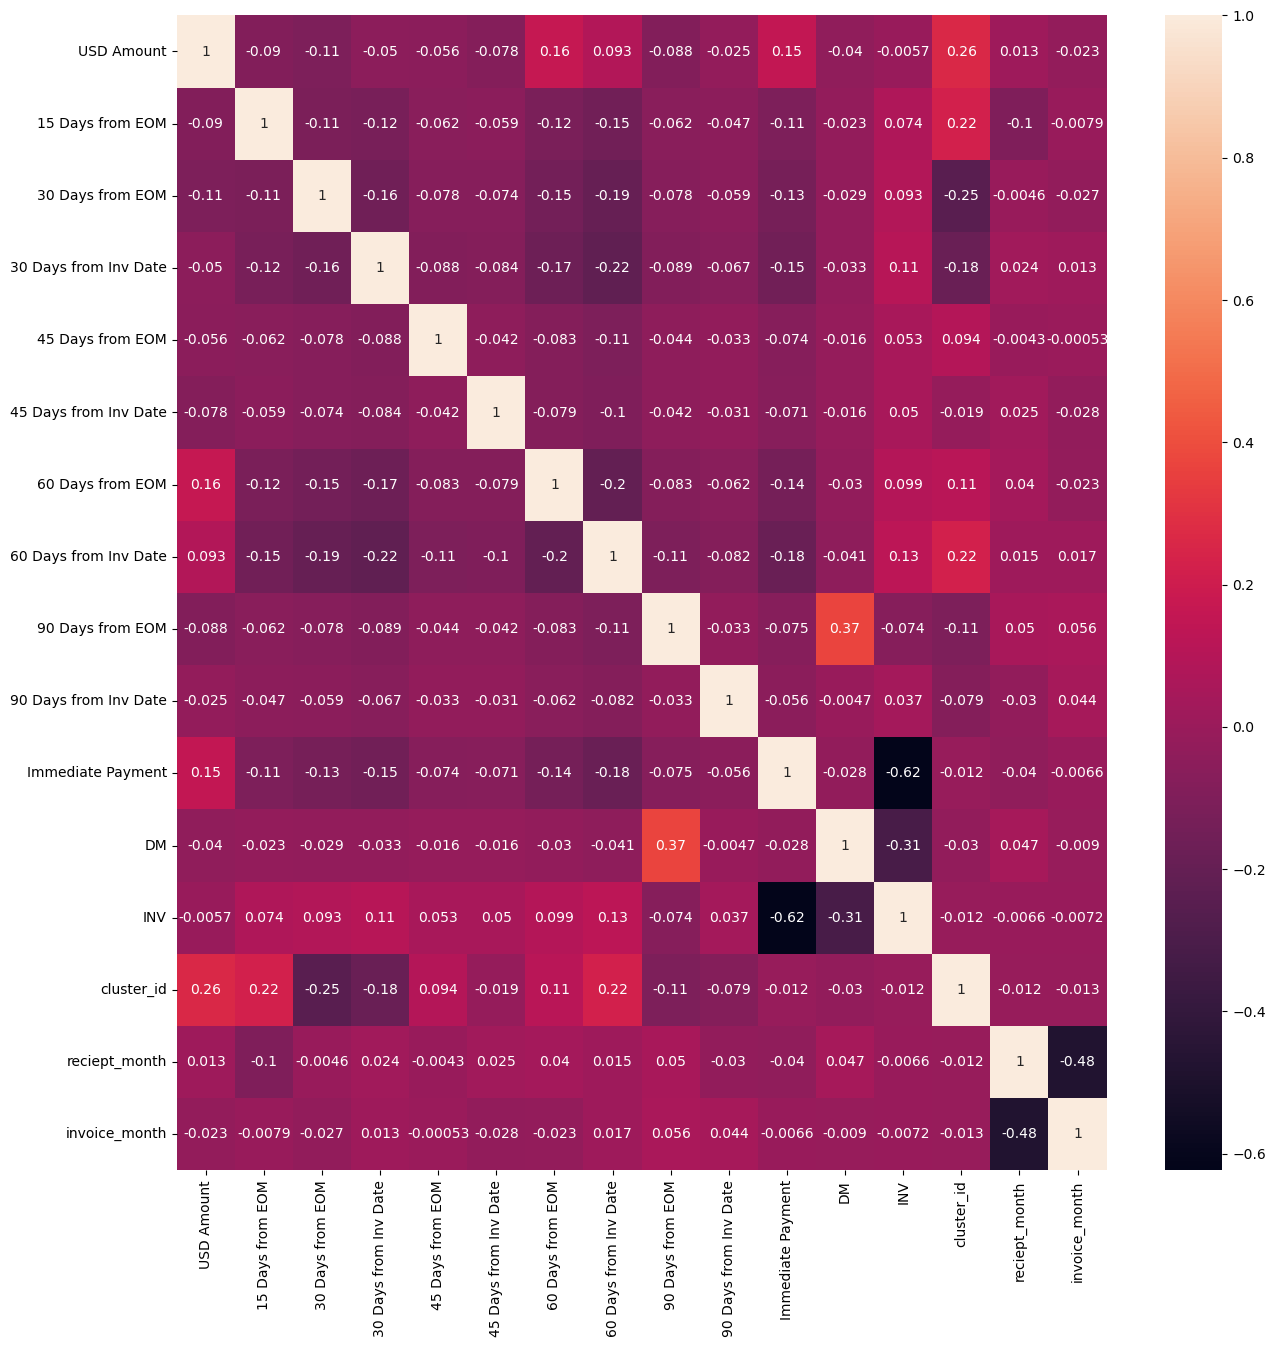

In [144]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

### Building Logistic Regression Model

In [145]:
logml = sm.GLM(y_train.astype(int),(sm.add_constant(X_train)),family = sm.families.Binomial())
res = logml.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           LATE_PAYMENT   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64950
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29763.
Date:                Tue, 09 Apr 2024   Deviance:                       59526.
Time:                        21:29:11   Pearson chi2:                 6.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3100
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.35

In [146]:
## Predicted values for train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

52625    0.299902
29115    0.700283
80920    0.959286
55019    0.397437
82266    0.809263
16093    0.994652
54916    0.397437
15532    0.291813
2618     0.787619
79771    0.567481
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29990182, 0.70028335, 0.95928639, 0.39743712, 0.80926252,
       0.99465177, 0.39743712, 0.29181251, 0.78761885, 0.56748141])

In [148]:
y_eval = pd.DataFrame({'LP':y_train.values, 'LP_pred':y_train_pred})
y_eval.head()

,LP,LP_pred
0,0,0.299902
1,0,0.700283
2,1,0.959286
3,1,0.397437
4,0,0.809263


In [149]:
# taking cutoff of 0.5 for the final prediction cluster
y_eval['final_pred'] = y_eval['LP_pred'].map(lambda x:1 if x > 0.5 else 0) 
y_eval.head()

,LP,LP_pred,final_pred
0,0,0.299902,0
1,0,0.700283,1
2,1,0.959286,1
3,1,0.397437,0
4,0,0.809263,1


### Measuring model performance with confusion matrix

In [150]:
confusion = metrics.confusion_matrix(y_eval['LP'], y_eval['final_pred'])
confusion

array([[13156,  9193],
       [ 4767, 37851]], dtype=int64)

In [151]:
# Accuracy
metrics.accuracy_score(y_eval['LP'], y_eval['final_pred'])

0.7851216771591731

### Checking for Multi Collinearity (VIF)

In [152]:
col = X_train.columns
col = col.to_list()
col

['USD Amount',
 '15 Days from EOM',
 '30 Days from EOM',
 '30 Days from Inv Date',
 '45 Days from EOM',
 '45 Days from Inv Date',
 '60 Days from EOM',
 '60 Days from Inv Date',
 '90 Days from EOM',
 '90 Days from Inv Date',
 'Immediate Payment',
 'DM',
 'INV',
 'cluster_id',
 'reciept_month',
 'invoice_month']

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,INV,16.51
14,reciept_month,5.91
7,60 Days from Inv Date,4.84
3,30 Days from Inv Date,3.51
6,60 Days from EOM,3.40
15,invoice_month,3.31
2,30 Days from EOM,2.95
13,cluster_id,2.80
1,15 Days from EOM,2.52
10,Immediate Payment,2.02


In [154]:
col.remove('INV')

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,reciept_month,5.05
7,60 Days from Inv Date,3.16
14,invoice_month,2.99
12,cluster_id,2.80
6,60 Days from EOM,2.33
3,30 Days from Inv Date,2.28
10,Immediate Payment,1.92
2,30 Days from EOM,1.91
1,15 Days from EOM,1.80
8,90 Days from EOM,1.60


In [156]:
col.remove('reciept_month')

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cluster_id,2.78
13,invoice_month,2.65
7,60 Days from Inv Date,1.94
6,60 Days from EOM,1.50
1,15 Days from EOM,1.49
3,30 Days from Inv Date,1.34
10,Immediate Payment,1.33
8,90 Days from EOM,1.30
2,30 Days from EOM,1.22
4,45 Days from EOM,1.20


In [158]:
logml = sm.GLM(y_train.astype(int),(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = logml.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           LATE_PAYMENT   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64952
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30146.
Date:                Tue, 09 Apr 2024   Deviance:                       60292.
Time:                        21:29:17   Pearson chi2:                 6.37e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3018
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [159]:
confusion = metrics.confusion_matrix(y_eval['LP'], y_eval['final_pred'])
confusion

array([[13156,  9193],
       [ 4767, 37851]], dtype=int64)

In [160]:
# Accuracy
metrics.accuracy_score(y_eval['LP'], y_eval['final_pred'])

0.7851216771591731

## Metrics beyond simply accuracy

In [161]:
y_eval.head()

,LP,LP_pred,final_pred
0,0,0.299902,0
1,0,0.700283,1
2,1,0.959286,1
3,1,0.397437,0
4,0,0.809263,1


In [162]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_eval['LP'], y_eval['final_pred'])
confusion

array([[13156,  9193],
       [ 4767, 37851]], dtype=int64)

In [163]:
TP_train = confusion[1,1] # true positive 
TN_train = confusion[0,0] # true negatives
FP_train = confusion[0,1] # false positives
FN_train = confusion[1,0] # false negatives

print ('TP = ', TP_train)
print ('TN = ', TN_train)
print ('FP = ', FP_train)
print ('FN = ', FN_train)

TP =  37851
TN =  13156
FP =  9193
FN =  4767


In [164]:
# Let's see the sensitivity of our logistic regression model

print ('Sensitivity = ',  TP_train / float(TP_train + FN_train))

# Let us calculate specificity
print ('Specificity = ', TN_train / float(TN_train + FP_train))

#Calculate False Postive Rate (FPR) - predicting Conversion when Lead hasn't actuallly converted
print ('False Positive Rate = ', FP_train/ float(TN_train + FP_train))

print ('Positive Predictive Value = ', TP_train / float(TP_train + FP_train))
print ('Negative Predictive Value = ', TN_train / float(TN_train + FN_train))

Sensitivity =  0.8881458538645642
Specificity =  0.588661685086581
False Positive Rate =  0.41133831491341893
Positive Predictive Value =  0.8045871949664144
Negative Predictive Value =  0.734028901411594


### Random Forest

In [165]:
reg.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,4,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,2,1,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [166]:
# creating X and y
X = reg
y = merged['LATE_PAYMENT']

In [167]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [169]:
y_train_pred_rf = rf.predict(X_train_rf)

In [170]:
accuracy = metrics.accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)


              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22349
           1       0.96      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.9586251481521387


In [171]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9689801626019484
Standard deviation: 0.001784689281506485


In [172]:
y_test_pred_rf = rf.predict(X_test_rf) # Creating y_pred for test data

In [173]:
accuracy = metrics.accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9529
           1       0.94      0.97      0.96     18315

    accuracy                           0.94     27844
   macro avg       0.94      0.93      0.93     27844
weighted avg       0.94      0.94      0.94     27844

Accuracy is :  0.9399511564430398


In [174]:
#### Using Grid search for hyper-parameter tuning.
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42) # Classifier Object

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)


grid_search.fit(X_train_rf, y_train_rf)


# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)
print('===================================')

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9546570200986905
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22349
           1       0.96      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967



In [175]:
grid_search.best_score_

0.9546570200986905

In [176]:
# Test set

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9529
           1       0.94      0.97      0.96     18315

    accuracy                           0.94     27844
   macro avg       0.94      0.93      0.93     27844
weighted avg       0.94      0.94      0.94     27844



In [177]:
# Having a look at feature importance

importances = best_rf.feature_importances_
sorted_idx = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importances[idx]:.3f})")

Feature ranking:
1. USD Amount (0.235)
2. invoice_month (0.202)
3. reciept_month (0.140)
4. 60 Days from EOM (0.114)
5. 30 Days from EOM (0.106)
6. cluster_id (0.053)
7. Immediate Payment (0.045)
8. 15 Days from EOM (0.028)
9. 60 Days from Inv Date (0.016)
10. 30 Days from Inv Date (0.015)
11. 90 Days from EOM (0.013)
12. 90 Days from Inv Date (0.011)
13. INV (0.008)
14. 45 Days from EOM (0.007)
15. 45 Days from Inv Date (0.006)
16. DM (0.001)


# Predicting open invoice data

In [178]:
# negative AGE implies the Invoice is already past due

open_inv_df_neg_age = open_inv_df[ open_inv_df['AGE'] < 0]
open_inv_df_neg_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1


In [179]:
open_inv_df_neg_age.shape

(28080, 17)

In [180]:
open_inv_final = open_inv_df_neg_age.copy()

In [181]:
open_inv_final.drop(['Customer_Name','AGE'], axis= 1, inplace= True)

In [182]:
open_inv_final['invoice_month'] = open_inv_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [183]:
open_inv_final.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,invoice_month
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,3
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,3
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,3
6,2022-04-30,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,3
7,2022-04-30,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,3


In [184]:
open_inv_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [185]:
open_inv_final.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,invoice_month
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,3
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,3
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,3
6,25858,0,1,0,0,0,0,0,0,0,0,0,1,3
7,39873,0,1,0,0,0,0,0,0,0,0,0,1,3


In [186]:
X_train_final= X_train_rf.copy() # Creating copy

X_test_final = X_test_rf.copy() # Creating copy 

y_train_final = y_train_rf.copy() # Creating copy 

y_test_final = y_test_rf.copy() # Creating copy 

In [187]:
X_train_final.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
52625,10110.77468,0,1,0,0,0,0,0,0,0,0,0,1,0,6,5
29115,20469.08000,0,0,0,0,0,0,1,0,0,0,0,1,0,5,4
80920,19816.98173,0,0,0,0,0,0,0,1,0,0,1,0,0,5,12
55019,655652.78150,0,0,0,0,0,1,0,0,0,0,0,1,0,3,12
82266,268512.93000,0,0,0,0,0,0,1,0,0,0,0,1,2,1,12


In [188]:
X_test_final.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,reciept_month,invoice_month
12743,1.742035e+04,0,0,0,0,0,1,0,0,0,0,0,1,0,3,3
75338,9.057670e+04,0,0,0,0,0,0,1,0,0,0,0,1,2,1,8
39614,1.640018e+05,0,0,0,0,0,0,0,0,0,1,0,1,0,6,5
52529,2.046146e+03,0,1,0,0,0,0,0,0,0,0,0,1,0,6,5
47001,1.076600e+06,0,1,0,0,0,0,0,0,0,0,0,1,2,5,4


In [189]:
# Dropping cluster_id and Receipt Month from modeling data
X_train_final.drop(['cluster_id','reciept_month'], axis= 1, inplace= True)
X_test_final.drop(['cluster_id','reciept_month'], axis= 1, inplace= True)

In [190]:
X_train_final.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,invoice_month
52625,10110.77468,0,1,0,0,0,0,0,0,0,0,0,1,5
29115,20469.08000,0,0,0,0,0,0,1,0,0,0,0,1,4
80920,19816.98173,0,0,0,0,0,0,0,1,0,0,1,0,12
55019,655652.78150,0,0,0,0,0,1,0,0,0,0,0,1,12
82266,268512.93000,0,0,0,0,0,0,1,0,0,0,0,1,12


In [191]:
# scaler = StandardScaler()

# col_to_scale = ['USD Amount']

# X_train_final[col_to_scale] = scaler.fit_transform(X_train_final[col_to_scale])

# X_train_final.head()

In [192]:
# Logistic Regression
logml = sm.GLM(y_train_final.astype(int),(sm.add_constant(X_train_final)),family = sm.families.Binomial())
res=logml.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           LATE_PAYMENT   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64952
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30198.
Date:                Tue, 09 Apr 2024   Deviance:                       60395.
Time:                        22:08:36   Pearson chi2:                 6.41e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3007
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [193]:
prob = res.predict(sm.add_constant(X_train_final))

prob

52625    0.227791
29115    0.696739
80920    0.942854
55019    0.407828
82266    0.829906
           ...   
6265     0.738321
54886    0.192798
76820    0.870162
860      0.899456
15795    0.995446
Length: 64967, dtype: float64

In [194]:
prob_df= pd.DataFrame(data= {'y_actual': y_train_final,'y_prob':prob})
prob_df

,y_actual,y_prob
52625,0,0.227791
29115,0,0.696739
80920,1,0.942854
55019,1,0.407828
82266,0,0.829906
...,...,...
6265,0,0.738321
54886,1,0.192798
76820,1,0.870162
860,1,0.899456


In [195]:
# multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    prob_df[f'{i}'] = prob_df['y_prob'].apply(lambda x : 1 if x > i else 0)
prob_df

,y_actual,y_prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
52625,0,0.227791,1,1,0,0,0,0,0,0,0
29115,0,0.696739,1,1,1,1,1,1,0,0,0
80920,1,0.942854,1,1,1,1,1,1,1,1,1
55019,1,0.407828,1,1,1,1,0,0,0,0,0
82266,0,0.829906,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0.738321,1,1,1,1,1,1,1,0,0
54886,1,0.192798,1,0,0,0,0,0,0,0,0
76820,1,0.870162,1,1,1,1,1,1,1,1,0
860,1,0.899456,1,1,1,1,1,1,1,1,0


In [196]:
# Creating a dictionary of all scores
scores= {}
for i in prob_df.columns[2:]:
    preds = prob_df['y_prob'].apply(lambda x : 1 if x > float(i[-3:]) else 0)
    scores[i]= {'Precision': metrics.precision_score(prob_df['y_actual'], preds),
                'Recall':metrics.recall_score(prob_df['y_actual'], preds),
                'Accuracy':metrics.accuracy_score(prob_df['y_actual'], preds)}
    

In [197]:
# creating a dataframe

scores_df = pd.DataFrame(data= scores)
scores_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Precision,0.655995,0.702319,0.764634,0.785216,0.801044,0.807535,0.860422,0.925671,0.978510
Recall,1.000000,0.976207,0.948660,0.910742,0.889084,0.874630,0.678235,0.504364,0.302361
Accuracy,0.655995,0.712962,0.774763,0.778026,0.782382,0.781012,0.716749,0.648298,0.537996


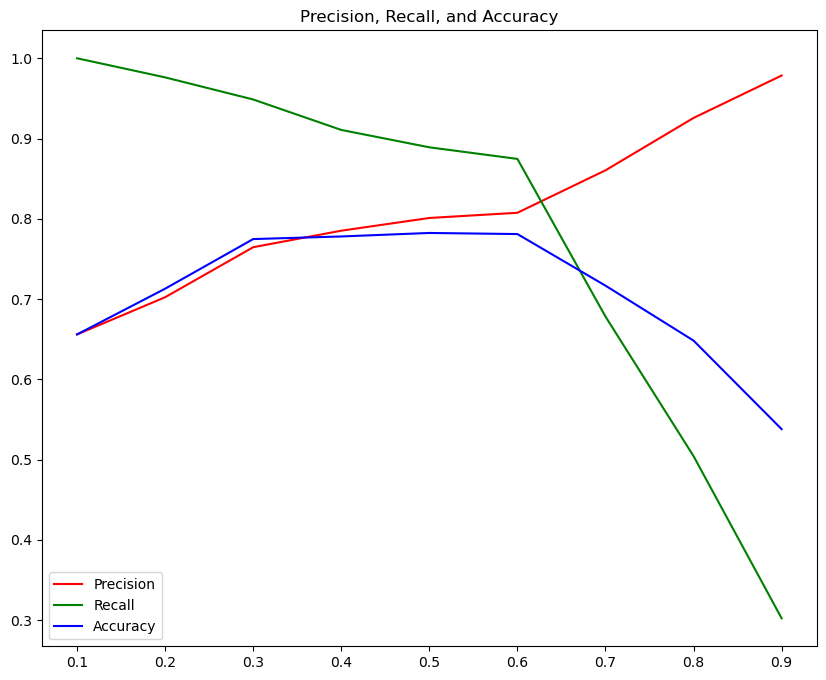

In [198]:
# plotting the socres of different threshold values
plt.figure(figsize= (10,8))

plt.plot(scores_df.loc['Precision'], color= 'red', label= 'Precision')
plt.plot(scores_df.loc['Recall'], color= 'green', label= 'Recall')
plt.plot(scores_df.loc['Accuracy'], color= 'blue', label= 'Accuracy')

plt.title('Precision, Recall, and Accuracy')

plt.legend(loc= 'best')

plt.show()

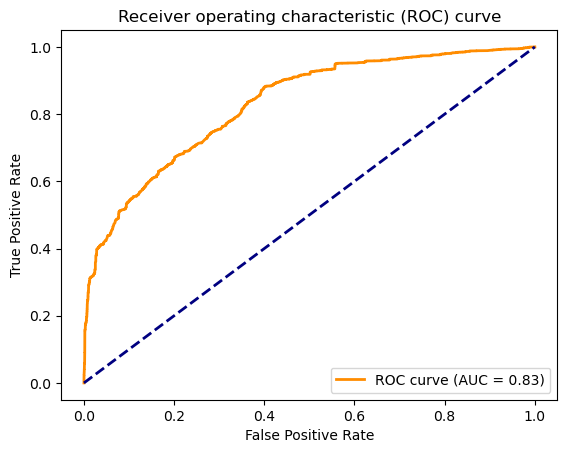

In [199]:
# Plotting a roc auc curve

from sklearn.metrics import roc_curve, auc

# y_true and y_pred_proba are the true labels and predicted probabilities, respectively
fpr, tpr, thresholds = roc_curve(prob_df['y_actual'], prob_df['y_prob'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [200]:
# predicting y_train_values with threshold of 0.5
y_train_pred_thresh_final = res.predict(sm.add_constant(X_train_final)).apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_thresh_final

52625    0
29115    1
80920    1
55019    0
82266    1
        ..
6265     1
54886    0
76820    1
860      1
15795    1
Length: 64967, dtype: int64

In [201]:
# Printing the classification report

print(classification_report(y_train_final, y_train_pred_thresh_final))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65     22349
           1       0.80      0.89      0.84     42618

    accuracy                           0.78     64967
   macro avg       0.77      0.73      0.74     64967
weighted avg       0.78      0.78      0.78     64967



In [202]:
# Checking if our model is overfitting

y_test_pred_thresh_final = res.predict(sm.add_constant(X_test_final)).apply(lambda x : 1 if x > 0.5 else 0)
y_test_pred_thresh_final

12743    0
75338    1
39614    1
52529    0
47001    0
        ..
24293    0
50020    1
48116    1
61034    1
22143    0
Length: 27844, dtype: int64

In [203]:
# Printing the classification report

print(classification_report(y_test_final, y_test_pred_thresh_final))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      9529
           1       0.80      0.89      0.84     18315

    accuracy                           0.78     27844
   macro avg       0.77      0.74      0.75     27844
weighted avg       0.78      0.78      0.78     27844



In [204]:
open_inv_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV',
       'invoice_month'],
      dtype='object')

In [205]:
X_train_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV',
       'invoice_month'],
      dtype='object')

In [206]:
open_inv_final = open_inv_final[X_train_final.columns] # fixing the order of columns

In [207]:
open_inv_final_pred = res.predict(sm.add_constant(open_inv_final)) # Predicting probability values
open_inv_final_pred

2        0.756899
4        0.195772
5        0.195799
6        0.195533
7        0.195382
           ...   
88172    0.676277
88186    0.674613
88187    0.675846
88188    0.675927
88189    0.674110
Length: 28080, dtype: float64

### Final Prediction

In [208]:
open_inv_df_neg_age['prob_late_pay'] = open_inv_final_pred
open_inv_df_neg_age

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,prob_late_pay
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0.756899
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195772
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195799
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195533
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88172,MIDD Corp,2022-05-29,-54,3435,2022-03-30 11:10:00,0,0,0,0,0,0,1,0,0,0,0,1,0.676277
88186,SAUD Corp,2022-06-05,-31,114039,2022-03-07 09:58:00,0,0,0,0,0,0,1,0,0,0,0,1,0.674613
88187,SAUD Corp,2022-05-16,-41,32138,2022-03-17 08:21:00,0,0,0,0,0,0,1,0,0,0,0,1,0.675846
88188,SAUD Corp,2022-05-17,-42,26764,2022-03-18 10:48:00,0,0,0,0,0,0,1,0,0,0,0,1,0.675927


In [209]:
customer_prob = round(open_inv_df_neg_age.groupby(by = 'Customer_Name')['prob_late_pay'].prod(),4)
customer_prob                                                                 

Customer_Name
2H F Corp    0.0802
3D D Corp    0.0000
6TH  Corp    0.0465
ABDU Corp    0.0000
ABEE Corp    0.4145
              ...  
ZAIN Corp    0.2711
ZALL Corp    0.1761
ZALZ Corp    0.0006
ZINA Corp    0.1955
ZUHA Corp    0.1716
Name: prob_late_pay, Length: 495, dtype: float64

In [210]:
customer_seg_prob = pd.DataFrame(customer_prob)
customer_seg_prob

,prob_late_pay
Customer_Name,
2H F Corp,0.0802
3D D Corp,0.0000
6TH Corp,0.0465
ABDU Corp,0.0000
ABEE Corp,0.4145
...,...
ZAIN Corp,0.2711
ZALL Corp,0.1761
ZALZ Corp,0.0006


In [211]:
customer_seg_prob.rename({'prob_late_pay':'prob_LR'}, inplace= True, axis= 1)
customer_seg_prob

,prob_LR
Customer_Name,
2H F Corp,0.0802
3D D Corp,0.0000
6TH Corp,0.0465
ABDU Corp,0.0000
ABEE Corp,0.4145
...,...
ZAIN Corp,0.2711
ZALL Corp,0.1761
ZALZ Corp,0.0006


In [212]:
# Using randomized search cv to find the best params
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Define the random search object
rs = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Fit the random search object to the data
rs.fit(X_train_final, y_train_final)

# Print the best hyperparameters and score
print("Best hyperparameters:", rs.best_params_)
print("Best F1 score:", rs.best_score_)

best_rf= rs.best_estimator_

Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best F1 score: 0.9390080203433223


In [213]:
y_train_pred_rf = best_rf.predict(X_train_final) # predicting y train

# printing classification report

print(classification_report(y_train_final, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22349
           1       0.95      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967



In [214]:
y_test_pred_rf = best_rf.predict(X_test_final) # Predicting y test

# Printing classification report

print(classification_report(y_test_final, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      9529
           1       0.93      0.96      0.94     18315

    accuracy                           0.92     27844
   macro avg       0.92      0.90      0.91     27844
weighted avg       0.92      0.92      0.92     27844



In [215]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_inv_final)[:,1]

y_open_invoices

array([0.97712601, 0.95366732, 0.87691878, ..., 0.41445407, 0.87424192,
       0.03044189])

In [216]:
open_inv_df_neg_age['pred_RF'] = y_open_invoices

In [217]:
open_inv_df_neg_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,prob_late_pay,pred_RF
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0.756899,0.977126
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195772,0.953667
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195799,0.876919
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195533,0.026667
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0.195382,0.993333


In [218]:
## Grouping by Customer Name and using mean to find the probability of the customer will make late payment

customer_seg_prob['prob_RF'] = open_inv_df_neg_age.groupby('Customer_Name').mean()['pred_RF']
customer_seg_prob

,prob_LR,prob_RF
Customer_Name,,
2H F Corp,0.0802,0.611111
3D D Corp,0.0000,0.277414
6TH Corp,0.0465,0.200476
ABDU Corp,0.0000,0.414182
ABEE Corp,0.4145,0.526667
...,...,...
ZAIN Corp,0.2711,0.725475
ZALL Corp,0.1761,0.278430
ZALZ Corp,0.0006,0.579526


## Thank You !